In [24]:
import minpy.numpy as np
import pandas as pd
import seaborn
from nltk.corpus import stopwords
from itertools import chain
from nltk.probability import FreqDist

In [25]:
data_read=pd.read_csv("Finance_actuariat_usa.csv",delimiter=",",header=0)
data_read.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Actuarial Analyst (Health),"The Segal Group, Inc.",NaN,Relevant work experience to include internship...,The Opportunity\n\nThe Associate works indepen...
1,New+York,2019 Actuarial Summer Internship,New York Life Insurance Co,NaN,2019 Summer Actuarial Intern. We provide our a...,"Temporary, InternshipA career at New York Life..."
2,New+York,Actuarial Analyst,UnitedHealth Group,NaN,"Bachelor’s degree in Mathematics, Actuarial Sc...",Othermultiple teams within UnitedHealthcare. T...
3,New+York,Actuarial Analyst,AIG,NaN,Successful completion of actuarial exams; BS i...,Functional Area:\nAC - Actuarial\n\n\nEstimate...
4,New+York,Actuarial Intern,AXIS Insurance,NaN,The Actuarial Intern is expected to successful...,"Part-time, InternshipThis is your opportunity ..."


In [26]:
# enlever ponctuation
data_read["resume"]= data_read["resume"].str.replace('[^\w\s]','')
data_read["description"]=data_read["description"].str.replace('[^\w\s]','')
# transformer les lettres en minuscule:
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
# enlever stopword 
stop = stopwords.words('english')
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))

Lorsque l'on fait le lemmisation ou stemisation certaines mots clés changent donc pour cette étude, on va garder nos données textuelles telle qu'elle est.

In [7]:
len([k.lower() for k in data_read.description  if "actuarial" in k.lower()])

11677

## Analyse descriptif:

Tout d'abord, on va faire une fonction qui va retourner un dataframe contenant la liste des mots comme rowname et comme colonne les occurences.


In [6]:
from collections import Counter
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
def word_count_text(List_text,N_min=7500,tokenizer_true=False):
    der="".join(List_text)
    tokens = nltk.word_tokenize(" ".join(List_text))
    fdist=FreqDist(tokens)
    ## Compter le nombre d'occurence des mots
    dict_word=dict(fdist)
    # On enregistre les mots dans un dataframe
    pd_dict_word=pd.DataFrame(list(dict_word.values()),index=dict_word.keys(),columns=["occurence"])
    pd_dict_word=pd_dict_word.sort_values(by="occurence",ascending=False)
    ## On filtre les mots dont l'occurence sont supérieurs à N_min
    pd_dict_word=pd_dict_word.loc[pd_dict_word.occurence>N_min,:]
    # on retourne un dataframe
    return pd_dict_word

## Bag of word:¶

Dans cette partie, on va contruire notre sac de mot d'une part, et d'autre part, on va aussi compter le nombre de fois où revient un mot.Ici on ne va conciderer que les mots ayant comme occurence plus de 7500 fois.


In [9]:
description=data_read.description.tolist()
pd_dict_word= word_count_text(description)

## Visualisation des mots les plus fréquents:

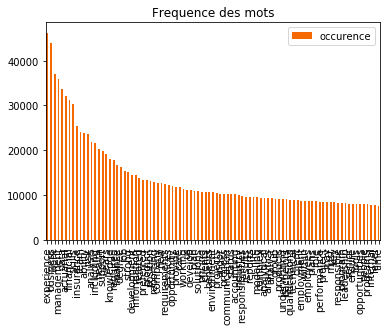

In [10]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

Pour avoir une visualisation de nos données de façon assez concret, on va faire un wordclouding:

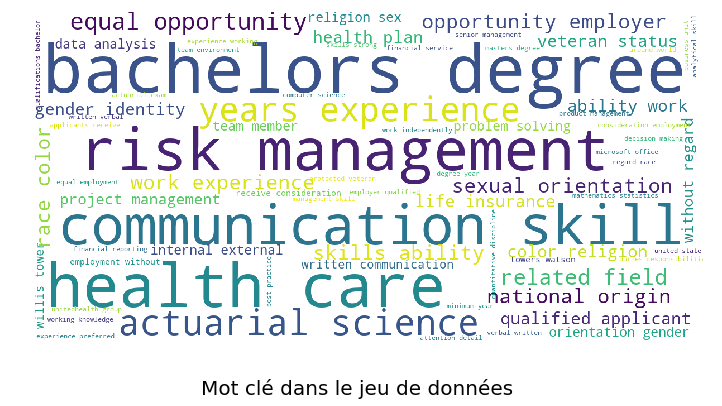

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
stopwords = set(STOPWORDS) 
def show_wordcloud(data,stopwords=stopwords,title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## word clue:
Dans cette partie, on va étudier les mots clés que l'on considère être des mots  clés connus dans le domaine de la data science. On va tout d'abord étudier les mots liés au outils utilisés dans le domaine de la data science. Pour le logiciel r on va mettre des espaces avant et après la lettre r pour ne pas considérer les lettres r dans d'autres mots.

In [15]:
Mot_cle_technique = ['python',"sas",'r','sql','java','excel',"acces",'hadoop','spark','tableau',"vba"]

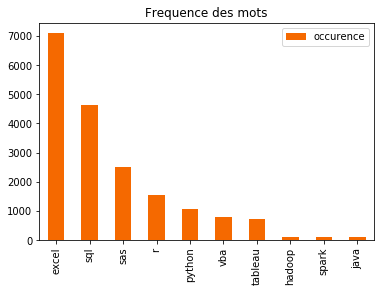

In [16]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

## Filtre que sur les postes d'actuariat et finance:

In [21]:
bolean=[ True if "actuar" in k.lower() or "financ" in k.lower() or "claim" in k.lower() or "insurance" in k.lower() else False for k in data_read.utituler_offre]

In [22]:
data_filtered=data_read[bolean]

In [23]:
data_filtered.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,actuarial analyst health,"The Segal Group, Inc.",NaN,Relevant work experience to include internship...,The Opportunity\n\nThe Associate works indepen...
1,New+York,2019 actuarial summer internship,New York Life Insurance Co,NaN,2019 Summer Actuarial Intern. We provide our a...,"Temporary, InternshipA career at New York Life..."
2,New+York,actuarial analyst,UnitedHealth Group,NaN,"Bachelor’s degree in Mathematics, Actuarial Sc...",Othermultiple teams within UnitedHealthcare. T...
3,New+York,actuarial analyst,AIG,NaN,Successful completion of actuarial exams; BS i...,Functional Area:\nAC - Actuarial\n\n\nEstimate...
4,New+York,actuarial intern,AXIS Insurance,NaN,The Actuarial Intern is expected to successful...,"Part-time, InternshipThis is your opportunity ..."


## Revisualisation des données:

In [20]:
description=data_filtered.description.tolist()
pd_dict_word= word_count_text(description,N_min=4000)

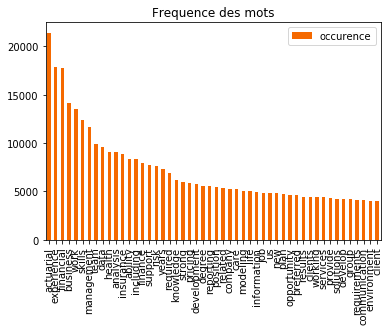

In [21]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

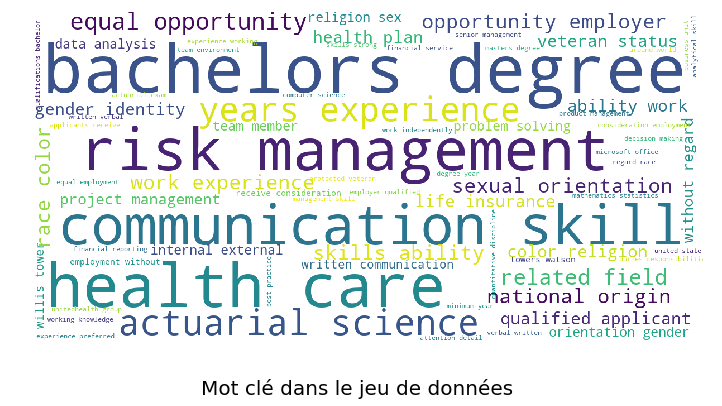

In [22]:
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## Outils en actuariat et finance:

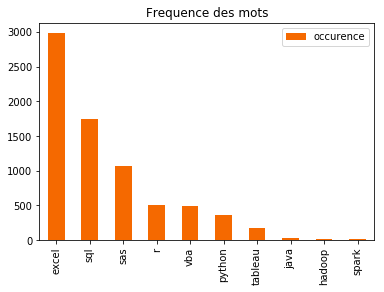

In [23]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

In [24]:
data_filtered.shape

(5087, 6)

In [25]:
data_filtered.to_csv("Finance_actuariat_filtered_job.csv",index=False)

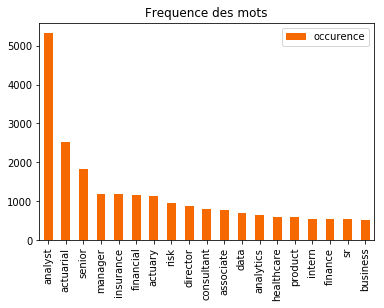

In [20]:
import string
rm_ponct = str.maketrans('','',string.punctuation)
data_read.utituler_offre= data_read.utituler_offre.apply(lambda x:x.translate(rm_ponct))

stop_en = stopwords.words("english")
data_read.utituler_offre = data_read.utituler_offre.apply(lambda x:" ".join(x.lower() for x in np.str(x).split() if x not in stop_en))

description=data_read.utituler_offre.tolist()
pd_dict_word= word_count_text(description,N_min=500)
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');